In [1]:
#Evaluate ACCESS-OM2-01 IAF Properties in Denman Region
#https://cchdo.ucsd.edu/search?bbox=105,-90,115,-50

In [10]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cartopy.crs as ccrs
import cmocean as cm
from collections import OrderedDict
import cftime
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client
import matplotlib.path as mpath

import cmocean.cm as cmocean
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pyproj import Proj, transform

In [11]:
client = Client(n_workers=8)
client

Client Scheduler: tcp://127.0.0.1:34859 Dashboard: /proxy/42021/status,Cluster Workers: 8 Cores: 8 Memory: 100.00 GiB


In [12]:
bedbathy=xr.open_mfdataset('/g/data/v45/pas561/bedmachineant/BedMach*.nc',engine='netcdf4',decode_times=False)
#bedbathy

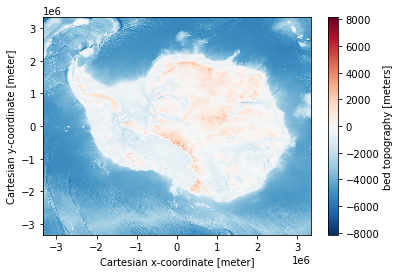

In [5]:
bedbathy.bed.plot.pcolormesh()

In [35]:
#bedbathy
bb=bedbathy.bed.sel(y=slice(-.2e6,-.7e6)).sel(x=slice(2.4e6,3e6)).load()
bb

<xarray.DataArray 'bed' (y: 1001, x: 1201)>
array([[  305.57874 ,   305.00488 ,   304.45117 , ..., -3467.0835  ,
        -3471.075   , -3475.0662  ],
       [  309.71484 ,   309.27002 ,   308.73633 , ..., -3463.2656  ,
        -3467.4307  , -3471.2483  ],
       [  314.59094 ,   314.32056 ,   314.19983 , ..., -3458.5803  ,
        -3462.5715  , -3466.563   ],
       ...,
       [  -60.760986,   -57.37097 ,   -53.30139 , ..., -4371.379   ,
        -4372.4204  , -4373.288   ],
       [  -51.200073,   -46.403564,   -41.38501 , ..., -4371.0317  ,
        -4371.8994  , -4372.941   ],
       [  -43.017944,   -35.62976 ,   -28.554565, ..., -4370.511   ,
        -4372.073   , -4373.1143  ]], dtype=float32)
Coordinates:
  * x        (x) int32 2400000 2400500 2401000 ... 2999000 2999500 3000000
  * y        (y) int32 -200000 -200500 -201000 ... -699000 -699500 -700000
Attributes:
    long_name:      bed topography
    standard_name:  bedrock_altitude
    units:          meters
    grid_mapping:   mapping
    source:         IBCSO and Mathieu Morlighem

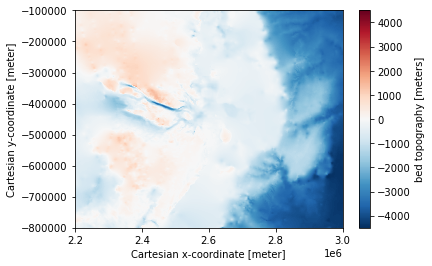

In [14]:
bb.plot.pcolormesh()

In [40]:
bb

<xarray.DataArray 'bed' (y: 1001, x: 1201)>
array([[  305.57874 ,   305.00488 ,   304.45117 , ..., -3467.0835  ,
        -3471.075   , -3475.0662  ],
       [  309.71484 ,   309.27002 ,   308.73633 , ..., -3463.2656  ,
        -3467.4307  , -3471.2483  ],
       [  314.59094 ,   314.32056 ,   314.19983 , ..., -3458.5803  ,
        -3462.5715  , -3466.563   ],
       ...,
       [  -60.760986,   -57.37097 ,   -53.30139 , ..., -4371.379   ,
        -4372.4204  , -4373.288   ],
       [  -51.200073,   -46.403564,   -41.38501 , ..., -4371.0317  ,
        -4371.8994  , -4372.941   ],
       [  -43.017944,   -35.62976 ,   -28.554565, ..., -4370.511   ,
        -4372.073   , -4373.1143  ]], dtype=float32)
Coordinates:
  * x        (x) int32 2400000 2400500 2401000 ... 2999000 2999500 3000000
  * y        (y) int32 -200000 -200500 -201000 ... -699000 -699500 -700000
Attributes:
    long_name:      bed topography
    standard_name:  bedrock_altitude
    units:          meters
    grid_mapping:   mapping
    source:         IBCSO and Mathieu Morlighem

In [46]:
c=bb.transpose()
c

<xarray.DataArray 'bed' (x: 1201, y: 1001)>
array([[  305.57874 ,   309.71484 ,   314.59094 , ...,   -60.760986,
          -51.200073,   -43.017944],
       [  305.00488 ,   309.27002 ,   314.32056 , ...,   -57.37097 ,
          -46.403564,   -35.62976 ],
       [  304.45117 ,   308.73633 ,   314.19983 , ...,   -53.30139 ,
          -41.38501 ,   -28.554565],
       ...,
       [-3467.0835  , -3463.2656  , -3458.5803  , ..., -4371.379   ,
        -4371.0317  , -4370.511   ],
       [-3471.075   , -3467.4307  , -3462.5715  , ..., -4372.4204  ,
        -4371.8994  , -4372.073   ],
       [-3475.0662  , -3471.2483  , -3466.563   , ..., -4373.288   ,
        -4372.941   , -4373.1143  ]], dtype=float32)
Coordinates:
  * x        (x) int32 2400000 2400500 2401000 ... 2999000 2999500 3000000
  * y        (y) int32 -200000 -200500 -201000 ... -699000 -699500 -700000
Attributes:
    long_name:      bed topography
    standard_name:  bedrock_altitude
    units:          meters
    grid_mapping:   mapping
    source:         IBCSO and Mathieu Morlighem

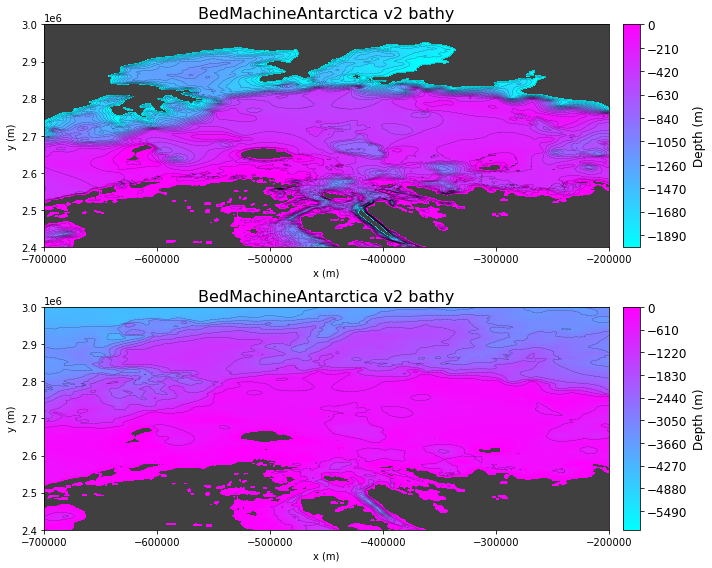

In [48]:
#plot using new lat lon coords .... stalls out
clev = np.arange(-2000,10,10)
clev2 = np.arange(-2000,0,100)
fontsize=12

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.gca().patch.set_color('.25')
#p1=plt.pcolormesh(bb.x,bb.y,bb,vmin=-1500, vmax=0,cmap=plt.cm.cool)
p1=plt.contourf(bb.y,bb.x,bb.transpose(),levels=clev,cmap=plt.cm.cool)
plt.contour(bb.y,bb.x,bb.transpose(),levels=clev2,colors='k',linewidths=0.25)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
#plt.ylim([0,-1e6])
#plt.xlim([2e6,3e6])
plt.title('BedMachineAntarctica v2 bathy',fontsize = 16)
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p1, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

clev = np.arange(-6000,10,10)
clev2 = np.arange(-6000,0,500)

plt.subplot(2,1,2)
plt.gca().patch.set_color('.25')
#p1=plt.pcolormesh(bb.x,bb.y,bb,vmin=-6000, vmax=0,cmap=plt.cm.cool)
p1=plt.contourf(bb.y,bb.x,bb.transpose(),levels=clev,cmap=plt.cm.cool)
plt.contour(bb.y,bb.x,bb.transpose(),levels=clev2,colors='k',linewidths=0.25)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
#plt.ylim([0,-1e6])
#plt.xlim([2e6,3e6])
plt.title('BedMachineAntarctica v2 bathy',fontsize = 16)
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p1, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

plt.tight_layout()

In [78]:
A
x2,y2 = transform(inProj,outProj,bedbathy.x.values,bedbathy.y.values)
print(x2,y2)
print(np.min(x2),np.max(x2),np.min(y2),np.max(y2))

[-45. -45. -45. ... 135. 135. 135.] [-48.46438311 -48.47009947 -48.47581604 ... -48.47581604 -48.47009947
 -48.46438311]
-45.0 135.0 -90.0 -48.464383106398614


In [85]:
print(bedbathy.x,bedbathy.y)

<xarray.DataArray 'x' (x: 13333)>
array([-3333000, -3332500, -3332000, ...,  3332000,  3332500,  3333000],
      dtype=int32)
Coordinates:
  * x        (x) int32 -3333000 -3332500 -3332000 ... 3332000 3332500 3333000
Attributes:
    long_name:      Cartesian x-coordinate
    standard_name:  projection_x_coordinate
    units:          meter <xarray.DataArray 'y' (y: 13333)>
array([ 3333000,  3332500,  3332000, ..., -3332000, -3332500, -3333000],
      dtype=int32)
Coordinates:
  * y        (y) int32 3333000 3332500 3332000 ... -3332000 -3332500 -3333000
Attributes:
    long_name:      Cartesian y-coordinate
    standard_name:  projection_y_coordinate
    units:          meter


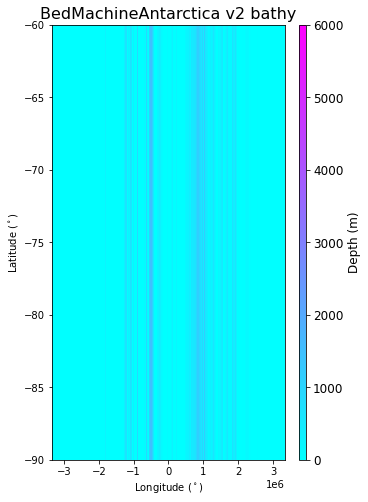

In [76]:
#np.nanmax(ht.values)
clev = np.arange(0,6000,10)
clev2 = np.arange(0,6000,500)
fontsize=12

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.gca().patch.set_color('.25')
p1=plt.pcolormesh(bedbathy.x,bedbathy.y,bedbathy.bed,vmin=0, vmax=6000,cmap=plt.cm.cool)
#plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=clev2,colors='k',linewidths=0.25)
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.ylim([-90,-60])
#plt.xlim([-270,-250])
plt.title('BedMachineAntarctica v2 bathy',fontsize = 16)
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p1, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)


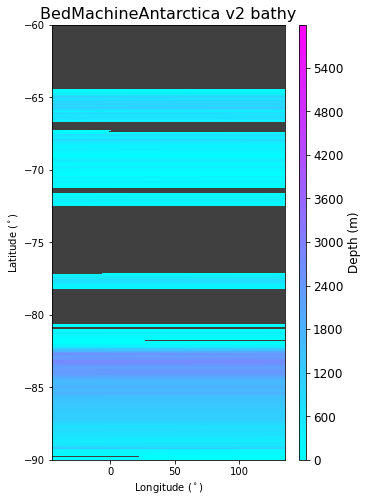

In [79]:
#plot using new lat lon coords .... stalls out
clev = np.arange(0,6000,10)
clev2 = np.arange(0,6000,500)
fontsize=12

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.gca().patch.set_color('.25')
p1=plt.contourf(x2,y2,bedbathy.bed,levels=clev,cmap=plt.cm.cool)
#plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=clev2,colors='k',linewidths=0.25)
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.ylim([-90,-60])
#plt.xlim([-270,-250])
plt.title('BedMachineAntarctica v2 bathy',fontsize = 16)
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p1, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

#Plot ACCCESS-OM2-01 model bathymetry

In [24]:

# database for control simulation:
master_session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
control = '01deg_jra55v13_ryf9091'

In [25]:
# topography data for plotting:
lat_slice  = slice(-82,-50.04) #-50.04-

ht = cc.querying.getvar(control,'ht' , master_session,n=1).sel(yt_ocean=lat_slice)
land_mask = np.squeeze(ht.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

In [26]:
np.nanmax(ht.values)

5808.6567

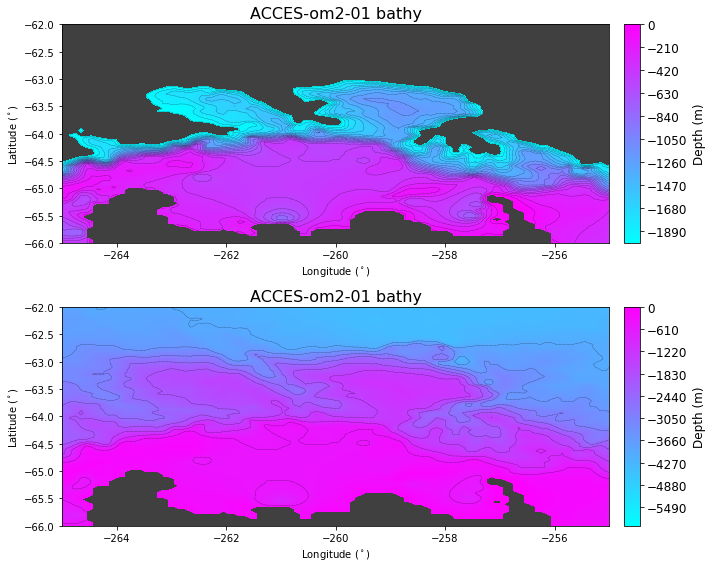

In [66]:
#np.nanmax(ht.values)
clev = np.arange(-2000,10,10)
clev2 = np.arange(-2000,0,100)
fontsize=12

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.gca().patch.set_color('.25')
#p1=plt.pcolormesh(ht.xt_ocean,ht.yt_ocean,ht,vmin=0, vmax=6000,cmap=plt.cm.cool)
p1=plt.contourf(ht.xt_ocean,ht.yt_ocean,-ht,levels=clev,cmap=plt.cm.cool)
plt.contour(ht.xt_ocean,ht.yt_ocean,-ht,levels=clev2,colors='k',linewidths=0.25)
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.ylim([-66,-62])
plt.xlim([-265,-255])
plt.title('ACCES-om2-01 bathy',fontsize = 16)
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p1, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

clev = np.arange(-6000,10,10)
clev2 = np.arange(-6000,0,500)

plt.subplot(2,1,2)
plt.gca().patch.set_color('.25')
#p1=plt.pcolormesh(ht.xt_ocean,ht.yt_ocean,ht,vmin=0, vmax=1500,cmap=plt.cm.cool)
p1=plt.contourf(ht.xt_ocean,ht.yt_ocean,-ht,levels=clev,cmap=plt.cm.cool)
plt.contour(ht.xt_ocean,ht.yt_ocean,-ht,levels=clev2,colors='k',linewidths=0.25)
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.ylim([-66,-62])
plt.xlim([-265,-255])
plt.title('ACCES-om2-01 bathy',fontsize = 16)
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p1, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

plt.tight_layout()

(1001, 1201) <xarray.DataArray 'bed' (y: 1001, x: 1201)>
array([[  305.57874 ,   305.00488 ,   304.45117 , ..., -3467.0835  ,
        -3471.075   , -3475.0662  ],
       [  309.71484 ,   309.27002 ,   308.73633 , ..., -3463.2656  ,
        -3467.4307  , -3471.2483  ],
       [  314.59094 ,   314.32056 ,   314.19983 , ..., -3458.5803  ,
        -3462.5715  , -3466.563   ],
       ...,
       [  -60.760986,   -57.37097 ,   -53.30139 , ..., -4371.379   ,
        -4372.4204  , -4373.288   ],
       [  -51.200073,   -46.403564,   -41.38501 , ..., -4371.0317  ,
        -4371.8994  , -4372.941   ],
       [  -43.017944,   -35.62976 ,   -28.554565, ..., -4370.511   ,
        -4372.073   , -4373.1143  ]], dtype=float32)
Coordinates:
  * x        (x) int32 2400000 2400500 2401000 ... 2999000 2999500 3000000
  * y        (y) int32 -200000 -200500 -201000 ... -699000 -699500 -700000
Attributes:
    long_name:      bed topography
    standard_name:  bedrock_altitude
    units:          meters
    g

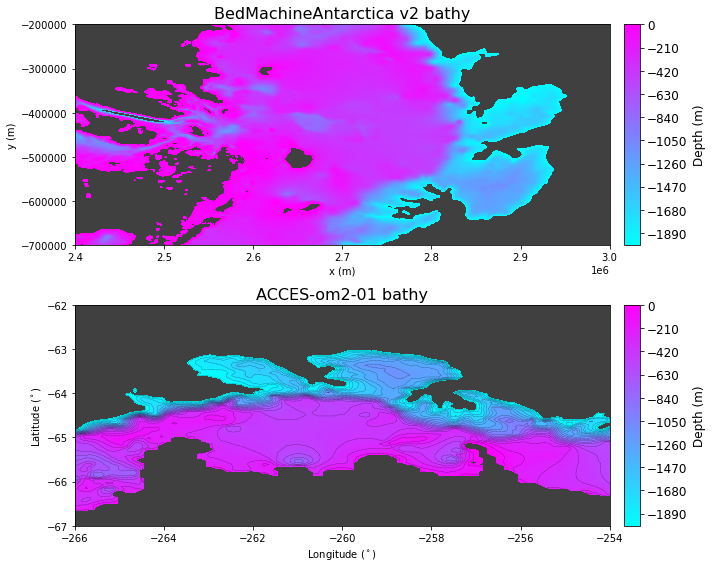

In [59]:
#plot using new lat lon coords .... stalls out
clev = np.arange(-2000,10,10)
clev2 = np.arange(-2000,0,100)
fontsize=12

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.gca().patch.set_color('.25')
#p1=plt.pcolormesh(bb.x,bb.y,bb,vmin=-1500, vmax=0,cmap=plt.cm.cool)
p1=plt.contourf(bb.x,bb.y,bb,orientation=u'vertical',levels=clev,cmap=plt.cm.cool)
#plt.contour(bb.y,bb.x,bb.transpose(),levels=clev2,colors='k',linewidths=0.25)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
#plt.ylim([0,-1e6])
#plt.xlim([2e6,3e6])
plt.title('BedMachineAntarctica v2 bathy',fontsize = 16)
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p1, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

#clev = np.arange(0,2000,10)
#clev2 = np.arange(0,2000,100)

plt.subplot(2,1,2)
plt.gca().patch.set_color('.25')
#p1=plt.pcolormesh(ht.xt_ocean,ht.yt_ocean,ht,vmin=0, vmax=6000,cmap=plt.cm.cool)
p1=plt.contourf(ht.xt_ocean,ht.yt_ocean,-ht,levels=clev,cmap=plt.cm.cool)
plt.contour(ht.xt_ocean,ht.yt_ocean,-ht,levels=clev2,colors='k',linewidths=0.25)
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.ylim([-67,-62])
plt.xlim([-266,-254])
plt.title('ACCES-om2-01 bathy',fontsize = 16)
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p1, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

plt.tight_layout()

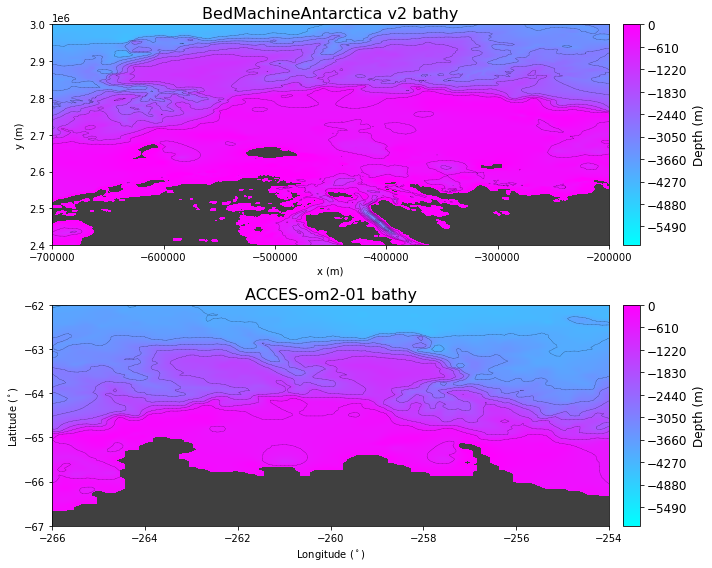

In [56]:
#plot using new lat lon coords .... stalls out
clev = np.arange(-6000,10,10)
clev2 = np.arange(-6000,0,500)
fontsize=12

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.gca().patch.set_color('.25')
#p1=plt.pcolormesh(bb.x,bb.y,bb,vmin=-1500, vmax=0,cmap=plt.cm.cool)
p1=plt.contourf(bb.y,bb.x,bb.transpose(),levels=clev,cmap=plt.cm.cool)
plt.contour(bb.y,bb.x,bb.transpose(),levels=clev2,colors='k',linewidths=0.25)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
#plt.ylim([0,-1e6])
#plt.xlim([2e6,3e6])
plt.title('BedMachineAntarctica v2 bathy',fontsize = 16)
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p1, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

#clev = np.arange(0,2000,10)
#clev2 = np.arange(0,2000,100)

plt.subplot(2,1,2)
plt.gca().patch.set_color('.25')
#p1=plt.pcolormesh(ht.xt_ocean,ht.yt_ocean,ht,vmin=0, vmax=6000,cmap=plt.cm.cool)
p1=plt.contourf(ht.xt_ocean,ht.yt_ocean,-ht,levels=clev,cmap=plt.cm.cool)
plt.contour(ht.xt_ocean,ht.yt_ocean,-ht,levels=clev2,colors='k',linewidths=0.25)
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.ylim([-67,-62])
plt.xlim([-266,-254])
plt.title('ACCES-om2-01 bathy',fontsize = 16)
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p1, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

plt.tight_layout()